<a href="https://colab.research.google.com/github/marinathomas/SentimentAnalysisHN/blob/master/2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.cloud import bigquery
import pandas as pd
import os
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = "/content/gdrive/Shared drives/HackerNews:SentimentAnalysis/"
credential_path = root_path+"hackernews-v2-14382f16e9b5.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path

In [0]:
client = bigquery.Client()
hn_dataset_ref = client.dataset('hacker_news', project='bigquery-public-data')
hn_dset = client.get_dataset(hn_dataset_ref)

In [0]:
csv_file = root_path +  "hackernews_full/2017.csv"
stories = pd.read_csv(csv_file, index_col=0) 

In [0]:
stories = stories.loc[stories['descendants']>0]

In [6]:
csv_file = root_path +  "hackernews_full/coments_2017.csv"
comments_temp_2017 = pd.read_csv(csv_file, index_col=0, header=0)
comments_temp_2017.shape 

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(2295314, 14)

In [7]:
csv_file = root_path +  "hackernews_full/coments_2018.csv"
comments_temp_2018 = pd.read_csv(csv_file, index_col=0, header=0)
comments_temp_2018.shape

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(2323562, 14)

In [0]:
all_comments = pd.concat([comments_temp_2017, comments_temp_2018], ignore_index=True)

In [9]:
stories.shape

(4933, 14)

In [10]:
all_comments.shape

(4618876, 14)

In [0]:
comments_2017 = pd.DataFrame()

In [0]:
comment_files=[]

In [58]:
dirName = root_path +  "results/2017/comments"
comment_files = os.listdir(dirName)
print(len(comment_files))

#fileName = "comments_"+str(13296439)+".csv"
#if fileName in comment_files:
#  print("Found")

4933


In [45]:
story_ids=[]
for index, story in stories.iterrows():
  story_ids.append(story['id'])

print(len(story_ids))

4933


In [53]:
not_present_count =0
for cname in comment_files:
  cnumber = cname.split("_")[1].split(".")[0]
  if int(cnumber) in story_ids:
    continue
  else:
    not_present_count +=1
    print(cnumber)
    
print(not_present_count)

13296439
13294862
13301077
13295734
13302309
13317144
13307117
13304794
13313010
13317225
13310154
13313048
13315239
13318458
13311234
13314375
13315080
13314729
13346748
13318211
13320626
13327911
13334703
13321447
13319653
13319838
13320686
13336969
13323560
13323291
13328574
13327900
13326138
13328534
13331214
13334815
13332240
13336047
13358424
13347917
13342547
13342973
13342166
13348281
13343347
13345078
13350116
13349891
13348137
13349102
13367004
13352545
13355154
13353415
13356162
13368482
13353448
13358430
13360831
13372142
13356852
13359093
13362931
13358193
13358627
13373880
13359634
13369979
13372743
13367457
13373972
13371283
13368423
13373170
13384458
13372979
13378011
13374805
13377127
13376092
13377368
13386045
13385573
13395580
13405293
13385040
13383511
13385054
13399291
13391858
13389994
13391262
13397007
13393923
13395391
13395722
13397190
13398110
13400482
13398855
13407108
13408875
13405208
13412861
13408358
13412580
13410049
13419976
13410521
13411685
13411408
1

In [56]:
for index, story in stories.iterrows():
  id = story['id'] #13292636 #13425089 #
  fileName = "comments_"+str(id)+".csv"
  if fileName in comment_files:
    continue
  print(id)
  bad_ids = [13425089, 15916350, 13658716, 13677748, 13975932]
  #if id in bad_ids:
  #  continue
  story_comments=pd.DataFrame()
  comment_ids = []
  count = 0;

  story_comments = all_comments.loc[all_comments['parent']== id]
  comment_ids = story_comments['id'].to_numpy()
  if id == 13425089:
    print(comment_ids)
  #print(len(story_comments))
  print(story['descendants'])
  while len(story_comments) < story['descendants']:
    if count == len(comment_ids):
      break
    id = comment_ids[count]
    #print(id)
    temp = all_comments.loc[all_comments['parent']== id]
    story_comments = pd.concat([story_comments, temp])
    comment_ids = np.concatenate((comment_ids, temp['id'].to_numpy()))
    count += 1
    #print(len(temp))
    print(len(comment_ids))
  #break;
  #print(comment_ids)

  #print(len(story_comments))
  #story_comments.head() 
  print('total  {} found  {}'.format(story['descendants'], comment_ids))
  csv_file = root_path +  "results/2017/comments/"+fileName
  story_comments.to_csv(csv_file)
  comments_2017 = pd.concat([comments_2017,story_comments])

13293894
22.0
14
15
16
16
17
17
17
17
17
17
18
18
19
19
20
20
21
22
total  22.0 found  [13294475 13294578 13294587 13294860 13294889 13294932 13295525 13295662
 13295776 13295898 13295947 13301045 13294937 13295470 13300974 13294654
 13295413 13296439 13300813 13303446 13295812 13296518]
13294375
6.0
5
5
6
total  6.0 found  [13294686 13294857 13294862 13294875 13295655 13294958]
13295049
8.0
3
4
6
6
7
7
8
total  8.0 found  [13296902 13347169 13297733 13347177 13300192 13301338 13301077 13301965]
13295057
2.0
2
total  2.0 found  [13295734 13295787]
13295998
1.0
total  1.0 found  [13296017]
13296297
5.0
3
4
5
total  5.0 found  [13299190 13299350 13302309 13302328 13303870]
13296863
1.0
total  1.0 found  [13296923]
13297192
30.0
11
12
16
18
22
23
23
24
24
24
24
24
24
24
24
24
24
24
25
25
26
27
27
28
29
29
30
total  30.0 found  [13297243 13297247 13297386 13297662 13297986 13298141 13298766 13298799
 13300186 13301853 13297685 13297335 13297526 13297610 13297621 13298107
 13298967 13299852

In [57]:
print(comments_2017.shape)

(59971, 14)


In [0]:
#all_story_comments_data = pd.DataFrame()
#story_with_comments_2017 = pd.DataFrame()

In [60]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 3.5MB/s 


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [62]:
processed = 0
def get_sentiment_score(row):
  global processed
  processed += 1
  if processed % 1000 == 0:
    print("|", end="")
  return analyser.polarity_scores(str(row['text']))

comments_2017['score'] = comments_2017.apply(get_sentiment_score,axis=1)

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [0]:
comments_2017['neg'] = comments_2017.apply(lambda x: x['score']['neg'],axis=1)
comments_2017['pos'] = comments_2017.apply(lambda x: x['score']['pos'],axis=1)
comments_2017['neu'] = comments_2017.apply(lambda x: x['score']['neu'],axis=1)
comments_2017['compound'] = comments_2017.apply(lambda x: x['score']['compound'],axis=1)

In [64]:
comments_2017.head()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted,neg,pos,neu,compound
498,NaN,NaN,"Btw, if you want <i>your</i> keyboard lights t...",NaN,lelandbatey,"{'neg': 0.0, 'neu': 0.928, 'pos': 0.072, 'comp...",1483239276,2017-01-01 02:54:36+00:00,comment,13294475,13293894,NaN,NaN,NaN,0.000,0.072,0.928,0.4215
592,NaN,NaN,"Random Linux trivia&#x2F;story: Back in 2002,...",NaN,elihu,"{'neg': 0.029, 'neu': 0.935, 'pos': 0.036, 'co...",1483241357,2017-01-01 03:29:17+00:00,comment,13294578,13293894,NaN,NaN,NaN,0.029,0.036,0.935,0.2023
601,NaN,NaN,"Cool, so does it blink for all http requests i...",NaN,grimmdude,"{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'comp...",1483241437,2017-01-01 03:30:37+00:00,comment,13294587,13293894,NaN,NaN,NaN,0.000,0.187,0.813,0.3182
840,NaN,NaN,Came here hoping my keyboard lights would blin...,NaN,patcheudor,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",1483250438,2017-01-01 06:00:38+00:00,comment,13294860,13293894,NaN,NaN,NaN,0.000,0.282,0.718,0.6249
867,NaN,NaN,This is very neat!<p>I created an Erlang scrip...,NaN,samwilliams,"{'neg': 0.0, 'neu': 0.947, 'pos': 0.053, 'comp...",1483251609,2017-01-01 06:20:09+00:00,comment,13294889,13293894,NaN,NaN,NaN,0.000,0.053,0.947,0.3982


In [65]:
!pip install textblob

In [67]:
from textblob import TextBlob

processed = 0
def get_textblob_sentiment_score(row):
  global processed
  processed += 1
  if processed % 1000 == 0:
    print("|", end="")
  return TextBlob(str(row['text'])).sentiment

comments_2017['textblob_score'] = comments_2017.apply(get_textblob_sentiment_score,axis=1)

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [0]:
comments_2017['polarity'] = comments_2017.apply(lambda x: x['textblob_score'].polarity,axis=1)
comments_2017['subjectivity'] = comments_2017.apply(lambda x: x['textblob_score'].subjectivity,axis=1)

In [0]:
destinationpath = root_path+"results/2017/all_story_comments.csv"
comments_2017.to_csv(destinationpath)

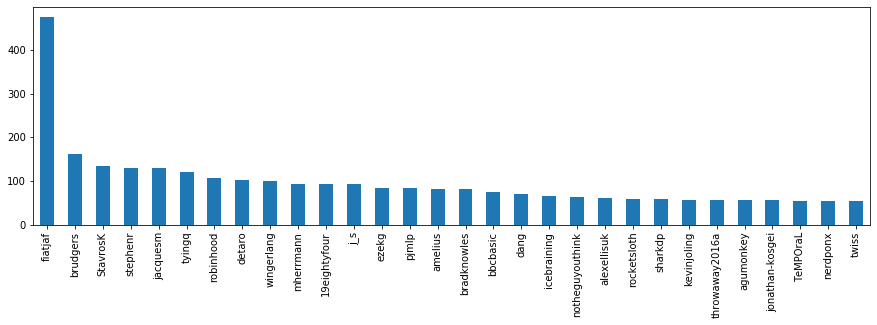

In [71]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,4))
comments_2017['by'].value_counts()[:30].plot(kind='bar')

In [0]:
comments_2017['vader_sentiment_label'] = comments_2017.apply(lambda x:  'Positive' if x['compound'] > .05  else 'Negative' if x['compound'] < -.05 else 'Neutral' ,axis=1)
comments_2017['textblob_sentiment_label'] = comments_2017.apply(lambda x:  'Positive' if x['polarity'] > .05  else 'Negative' if x['polarity'] < -.05 else 'Neutral' ,axis=1)
comments_2017['textblob_subjectivity_label'] = comments_2017.apply(lambda x:  'Subjective' if x['subjectivity'] >= .5  else 'Objective' ,axis=1)

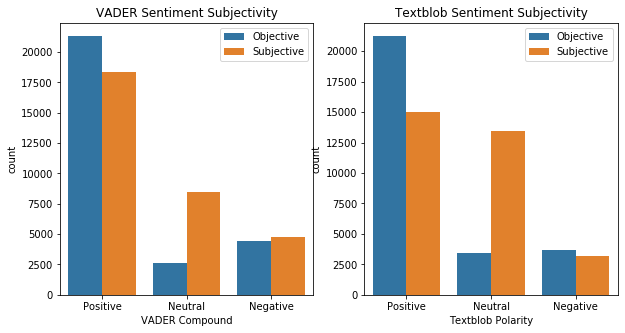

In [73]:
import seaborn as sns
#sns.set(style="darkgrid")
fig, ax =plt.subplots(1,2)
fig.set_size_inches(10,5)

vax = sns.countplot(x="vader_sentiment_label",hue="textblob_subjectivity_label", data=comments_2017, ax=ax[0])
vax.set_title('VADER Sentiment Subjectivity')
vax.set_xlabel('VADER Compound')
vax.legend(['Objective','Subjective'])

tax = sns.countplot(x="textblob_sentiment_label",hue="textblob_subjectivity_label", data=comments_2017, ax=ax[1])
tax.set_title('Textblob Sentiment Subjectivity')
tax.set_xlabel('Textblob Polarity')
tax.legend(['Objective','Subjective'])

Text(0, 0.5, 'TextBlob comment sentiment scores')

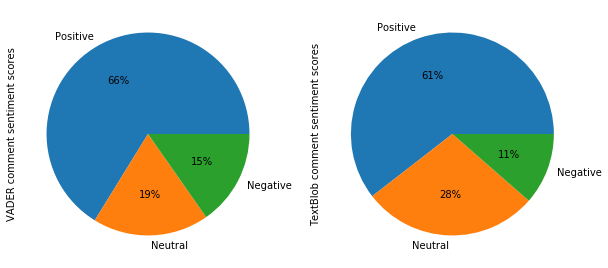

In [75]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(10,5)

vax = comments_2017['vader_sentiment_label'].value_counts().plot(kind='pie',ax=ax[0],autopct='%1.0f%%')
vax.set_ylabel('VADER comment sentiment scores')

tax = comments_2017['textblob_sentiment_label'].value_counts().plot(kind='pie',ax=ax[1],autopct='%1.0f%%')
tax.set_ylabel('TextBlob comment sentiment scores')

Text(0, 0.5, 'Textblob Polarity')

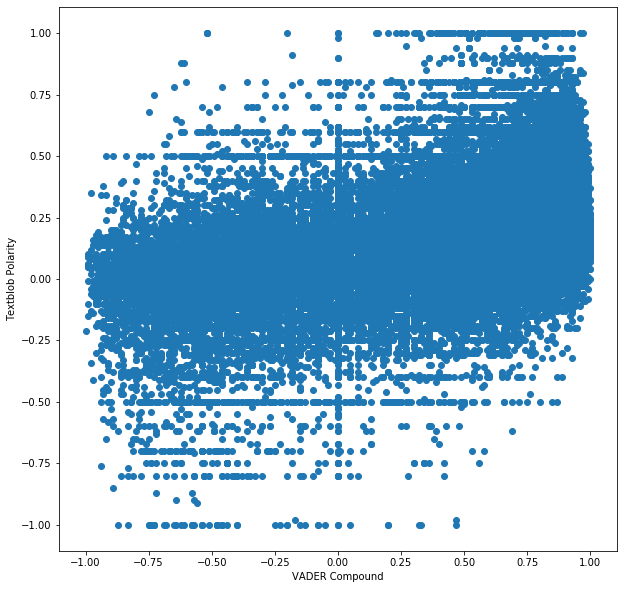

In [76]:
plt.figure(figsize=(10,10))
plt.scatter(comments_2017['compound'].round(2),comments_2017['polarity'].round(2))
plt.xlabel('VADER Compound')
plt.ylabel('Textblob Polarity')

In [0]:
csv_file = root_path +  "results/2017/stories_2017.csv"
scores_data = pd.read_csv(csv_file, index_col=0) 
scores_data.head()

import warnings
warnings.filterwarnings('ignore')

In [78]:
scores_data.head()

,Unnamed: 0.1,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted,active
0,0,Show HN: Blink my keyboard lights when you vis...,http://lelandbatey.com/posts/2016/12/Making-li...,NaN,NaN,lelandbatey,87,1483228883,2017-01-01 00:01:23+00:00,story,13293894,NaN,22.0,NaN,NaN,False
2,2,Show HN: Shadowsocks-rust – A fast SOCKSv5 pro...,https://github.com/loggerhead/shadowsocks-rust,NaN,NaN,loggerhead,68,1483237276,2017-01-01 02:21:16+00:00,story,13294375,NaN,6.0,NaN,NaN,False
7,7,Show HN: Math Worksheets for Kids,http://worksheets.guru/,NaN,NaN,javierluraschi,18,1483257608,2017-01-01 08:00:08+00:00,story,13295049,NaN,8.0,NaN,NaN,False
8,8,"Show HN: Soda Player, a “modern” player app",https://www.sodaplayer.com/,NaN,NaN,sodaplayer_team,5,1483257848,2017-01-01 08:04:08+00:00,story,13295057,NaN,2.0,NaN,NaN,True
9,9,Show HN: TopShots – Your top nine Dribbble sho...,https://topshots.co/,NaN,NaN,iisbum,7,1483284127,2017-01-01 15:22:07+00:00,story,13295998,NaN,1.0,NaN,NaN,True


In [0]:
scores_data = scores_data.reset_index()

In [82]:
scores_data.head()

,index,Unnamed: 0.1,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted,active
0,0,0,Show HN: Blink my keyboard lights when you vis...,http://lelandbatey.com/posts/2016/12/Making-li...,NaN,NaN,lelandbatey,87,1483228883,2017-01-01 00:01:23+00:00,story,13293894,NaN,22.0,NaN,NaN,False
1,2,2,Show HN: Shadowsocks-rust – A fast SOCKSv5 pro...,https://github.com/loggerhead/shadowsocks-rust,NaN,NaN,loggerhead,68,1483237276,2017-01-01 02:21:16+00:00,story,13294375,NaN,6.0,NaN,NaN,False
2,7,7,Show HN: Math Worksheets for Kids,http://worksheets.guru/,NaN,NaN,javierluraschi,18,1483257608,2017-01-01 08:00:08+00:00,story,13295049,NaN,8.0,NaN,NaN,False
3,8,8,"Show HN: Soda Player, a “modern” player app",https://www.sodaplayer.com/,NaN,NaN,sodaplayer_team,5,1483257848,2017-01-01 08:04:08+00:00,story,13295057,NaN,2.0,NaN,NaN,True
4,9,9,Show HN: TopShots – Your top nine Dribbble sho...,https://topshots.co/,NaN,NaN,iisbum,7,1483284127,2017-01-01 15:22:07+00:00,story,13295998,NaN,1.0,NaN,NaN,True


In [83]:
scores_data.columns

Index(['index', 'Unnamed: 0.1', 'title', 'url', 'text', 'dead', 'by', 'score',
       'time', 'timestamp', 'type', 'id', 'parent', 'descendants', 'ranking',
       'deleted', 'active'],
      dtype='object')

In [0]:
scores_data=scores_data.drop(columns=['index', 'Unnamed: 0.1'])

In [86]:
scores_data.columns

Index(['title', 'url', 'text', 'dead', 'by', 'score', 'time', 'timestamp',
       'type', 'id', 'parent', 'descendants', 'ranking', 'deleted', 'active'],
      dtype='object')

In [88]:
scores_data.head()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted,active
0,Show HN: Blink my keyboard lights when you vis...,http://lelandbatey.com/posts/2016/12/Making-li...,NaN,NaN,lelandbatey,87,1483228883,2017-01-01 00:01:23+00:00,story,13293894,NaN,22.0,NaN,NaN,False
1,Show HN: Shadowsocks-rust – A fast SOCKSv5 pro...,https://github.com/loggerhead/shadowsocks-rust,NaN,NaN,loggerhead,68,1483237276,2017-01-01 02:21:16+00:00,story,13294375,NaN,6.0,NaN,NaN,False
2,Show HN: Math Worksheets for Kids,http://worksheets.guru/,NaN,NaN,javierluraschi,18,1483257608,2017-01-01 08:00:08+00:00,story,13295049,NaN,8.0,NaN,NaN,False
3,"Show HN: Soda Player, a “modern” player app",https://www.sodaplayer.com/,NaN,NaN,sodaplayer_team,5,1483257848,2017-01-01 08:04:08+00:00,story,13295057,NaN,2.0,NaN,NaN,True
4,Show HN: TopShots – Your top nine Dribbble sho...,https://topshots.co/,NaN,NaN,iisbum,7,1483284127,2017-01-01 15:22:07+00:00,story,13295998,NaN,1.0,NaN,NaN,True


In [90]:
scores_data['vader_max_neg_top'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['neg'].max(),axis=1)
scores_data['vader_avg_neg_top'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['neg'].mean(),axis=1)

scores_data['vader_max_pos_top'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['pos'].max(),axis=1)
scores_data['vader_avg_pos_top'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['pos'].mean(),axis=1)

scores_data['vader_max_compound_top'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['compound'].max(),axis=1)
scores_data['vader_min_compound_top'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['compound'].min(),axis=1)
scores_data['vader_avg_compound_top'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['compound'].mean(),axis=1)

scores_data['vader_max_neg'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['neg'].max(),axis=1)
scores_data['vader_avg_neg'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['neg'].mean(),axis=1)

scores_data['vader_max_pos'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['pos'].max(),axis=1)
scores_data['vader_avg_pos'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['pos'].mean(),axis=1)

scores_data['vader_max_compound'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['compound'].max(),axis=1)
scores_data['vader_min_compound'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['compound'].min(),axis=1)
scores_data['vader_avg_compound'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['compound'].mean(),axis=1)

scores_data.head()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted,active,vader_max_neg_top,vader_avg_neg_top,vader_max_pos_top,vader_avg_pos_top,vader_max_compound_top,vader_min_compound_top,vader_avg_compound_top,vader_max_neg,vader_avg_neg,vader_max_pos,vader_avg_pos,vader_max_compound,vader_min_compound,vader_avg_compound
0,Show HN: Blink my keyboard lights when you vis...,http://lelandbatey.com/posts/2016/12/Making-li...,NaN,NaN,lelandbatey,87,1483228883,2017-01-01 00:01:23+00:00,story,13293894,NaN,22.0,NaN,NaN,False,0.061,0.0075,0.301,0.153417,0.9622,0.0000,0.551942,0.061,0.0075,0.301,0.153417,0.9622,0.0000,0.551942
1,Show HN: Shadowsocks-rust – A fast SOCKSv5 pro...,https://github.com/loggerhead/shadowsocks-rust,NaN,NaN,loggerhead,68,1483237276,2017-01-01 02:21:16+00:00,story,13294375,NaN,6.0,NaN,NaN,False,0.000,0.0000,0.247,0.155400,0.8423,0.0000,0.486340,0.000,0.0000,0.247,0.155400,0.8423,0.0000,0.486340
2,Show HN: Math Worksheets for Kids,http://worksheets.guru/,NaN,NaN,javierluraschi,18,1483257608,2017-01-01 08:00:08+00:00,story,13295049,NaN,8.0,NaN,NaN,False,0.000,0.0000,0.341,0.240000,0.6908,0.4404,0.565600,0.000,0.0000,0.341,0.240000,0.6908,0.4404,0.565600
3,"Show HN: Soda Player, a “modern” player app",https://www.sodaplayer.com/,NaN,NaN,sodaplayer_team,5,1483257848,2017-01-01 08:04:08+00:00,story,13295057,NaN,2.0,NaN,NaN,True,0.057,0.0570,0.060,0.060000,0.3356,0.3356,0.335600,0.057,0.0570,0.060,0.060000,0.3356,0.3356,0.335600
4,Show HN: TopShots – Your top nine Dribbble sho...,https://topshots.co/,NaN,NaN,iisbum,7,1483284127,2017-01-01 15:22:07+00:00,story,13295998,NaN,1.0,NaN,NaN,True,0.000,0.0000,0.264,0.264000,0.9186,0.9186,0.918600,0.000,0.0000,0.264,0.264000,0.9186,0.9186,0.918600


In [91]:
scores_data['textblob_max_polarity_top'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['polarity'].max(),axis=1)
scores_data['textblob_min_polarity_top'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['polarity'].min(),axis=1)
scores_data['textblob_avg_polarity_top'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['polarity'].mean(),axis=1)

scores_data['textblob_max_polarity'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['polarity'].max(),axis=1)
scores_data['textblob_min_polarity'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['polarity'].min(),axis=1)
scores_data['textblob_avg_polarity'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id]['polarity'].mean(),axis=1)

scores_data.head()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted,active,vader_max_neg_top,vader_avg_neg_top,vader_max_pos_top,vader_avg_pos_top,vader_max_compound_top,vader_min_compound_top,vader_avg_compound_top,vader_max_neg,vader_avg_neg,vader_max_pos,vader_avg_pos,vader_max_compound,vader_min_compound,vader_avg_compound,textblob_max_polarity_top,textblob_min_polarity_top,textblob_avg_polarity_top,textblob_max_polarity,textblob_min_polarity,textblob_avg_polarity
0,Show HN: Blink my keyboard lights when you vis...,http://lelandbatey.com/posts/2016/12/Making-li...,NaN,NaN,lelandbatey,87,1483228883,2017-01-01 00:01:23+00:00,story,13293894,NaN,22.0,NaN,NaN,False,0.061,0.0075,0.301,0.153417,0.9622,0.0000,0.551942,0.061,0.0075,0.301,0.153417,0.9622,0.0000,0.551942,0.550000,-0.100000,0.271114,0.550000,-0.100000,0.271114
1,Show HN: Shadowsocks-rust – A fast SOCKSv5 pro...,https://github.com/loggerhead/shadowsocks-rust,NaN,NaN,loggerhead,68,1483237276,2017-01-01 02:21:16+00:00,story,13294375,NaN,6.0,NaN,NaN,False,0.000,0.0000,0.247,0.155400,0.8423,0.0000,0.486340,0.000,0.0000,0.247,0.155400,0.8423,0.0000,0.486340,0.600000,-0.156250,0.184553,0.600000,-0.156250,0.184553
2,Show HN: Math Worksheets for Kids,http://worksheets.guru/,NaN,NaN,javierluraschi,18,1483257608,2017-01-01 08:00:08+00:00,story,13295049,NaN,8.0,NaN,NaN,False,0.000,0.0000,0.341,0.240000,0.6908,0.4404,0.565600,0.000,0.0000,0.341,0.240000,0.6908,0.4404,0.565600,0.333333,-0.500000,-0.083333,0.333333,-0.500000,-0.083333
3,"Show HN: Soda Player, a “modern” player app",https://www.sodaplayer.com/,NaN,NaN,sodaplayer_team,5,1483257848,2017-01-01 08:04:08+00:00,story,13295057,NaN,2.0,NaN,NaN,True,0.057,0.0570,0.060,0.060000,0.3356,0.3356,0.335600,0.057,0.0570,0.060,0.060000,0.3356,0.3356,0.335600,0.025397,0.025397,0.025397,0.025397,0.025397,0.025397
4,Show HN: TopShots – Your top nine Dribbble sho...,https://topshots.co/,NaN,NaN,iisbum,7,1483284127,2017-01-01 15:22:07+00:00,story,13295998,NaN,1.0,NaN,NaN,True,0.000,0.0000,0.264,0.264000,0.9186,0.9186,0.918600,0.000,0.0000,0.264,0.264000,0.9186,0.9186,0.918600,0.650000,0.650000,0.650000,0.650000,0.650000,0.650000


In [0]:
scores_data['textblob_avg_subjective'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id][comments_2017['subjectivity'] > 0.5]['polarity'].mean(),axis=1)
scores_data['textblob_avg_subjective'] = scores_data['textblob_avg_subjective'].fillna(0);

scores_data['textblob_avg_objective'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id][comments_2017['subjectivity'] <= 0.5]['polarity'].mean(),axis=1)
scores_data['textblob_avg_objective'] = scores_data['textblob_avg_objective'].fillna(0);

scores_data['vader_avg_compound_subjective'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id][comments_2017['subjectivity'] > 0.5]['compound'].mean(),axis=1)
scores_data['vader_avg_compound_subjective'] = scores_data['vader_avg_compound_subjective'].fillna(0);

scores_data['vader_avg_compound_objective'] = scores_data.apply(lambda x: comments_2017[comments_2017['parent'] == x.id][comments_2017['subjectivity'] <= 0.5]['compound'].mean(),axis=1)
scores_data['vader_avg_compound_objective'] = scores_data['vader_avg_compound_objective'].fillna(0);


In [0]:
destinationpath = root_path+"results/2017/story_scores.csv"
scores_data.to_csv(destinationpath)

In [0]:
columns = ['score'
  ,'descendants'
  ,'vader_max_neg'
  ,'vader_avg_neg'
  ,'vader_max_pos'
  ,'vader_avg_pos'
  ,'vader_max_compound'
  ,'vader_min_compound'
  ,'vader_avg_compound'
  ,'vader_max_neg_top'
  ,'vader_avg_neg_top'
  ,'vader_max_pos_top'
  ,'vader_avg_pos_top'
  ,'vader_max_compound_top'
  ,'vader_min_compound_top'
  ,'vader_avg_compound_top'
  ,'textblob_max_polarity'
  ,'textblob_min_polarity'
  ,'textblob_avg_polarity'
  ,'textblob_max_polarity_top'
  ,'textblob_min_polarity_top'
  ,'textblob_avg_polarity_top'
  ,'textblob_avg_subjective'
  ,'textblob_avg_objective'
  ,'vader_avg_compound_subjective'
  ,'vader_avg_compound_objective'
  ]
  
X = scores_data[columns]
y = scores_data[['active']]

In [110]:
y.isnull().values.sum()

0

In [0]:
y=y.fillna(value=False)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

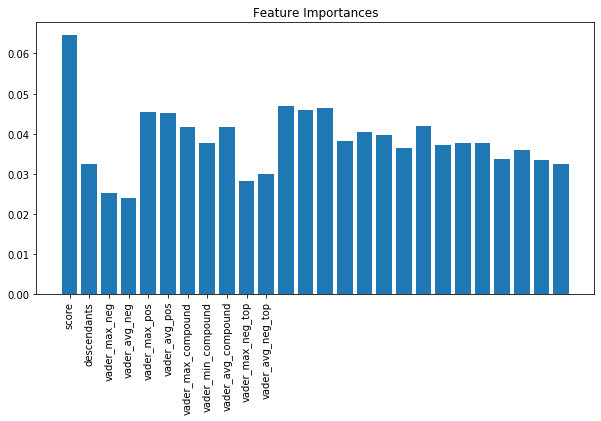

In [112]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

clf = RandomForestClassifier(random_state=0,n_jobs=-1)
m = clf.fit(X,y)

importances = m.feature_importances_

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.bar(range(len(columns)),m.feature_importances_)
plt.xticks(range(11),X.columns, rotation=90)
plt.show()

In [115]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.62      0.97      0.76       903
        True       0.63      0.08      0.14       577

    accuracy                           0.62      1480
   macro avg       0.62      0.53      0.45      1480
weighted avg       0.62      0.62      0.52      1480



In [117]:
!pip install xgboost

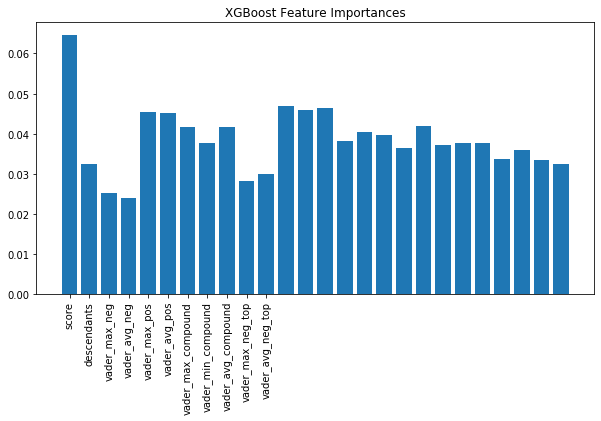

Accuracy: 58.72%


In [119]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic'}

xgmodel = XGBClassifier()
xgmodel.fit(X_train, y_train)

y_pred = xgmodel.predict(X_test)
predictions = [round(value) for value in y_pred]

importances = xgmodel.feature_importances_

plt.figure(figsize=(10,5))
plt.title('XGBoost Feature Importances')
plt.bar(range(len(columns)),m.feature_importances_)
plt.xticks(range(11),X.columns, rotation=90)
plt.show()

3
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [120]:
comments_2017.head()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted,neg,pos,neu,compound,textblob_score,polarity,subjectivity,vader_sentiment_label,textblob_sentiment_label,textblob_subjectivity_label
498,NaN,NaN,"Btw, if you want <i>your</i> keyboard lights t...",NaN,lelandbatey,"{'neg': 0.0, 'neu': 0.928, 'pos': 0.072, 'comp...",1483239276,2017-01-01 02:54:36+00:00,comment,13294475,13293894,NaN,NaN,NaN,0.000,0.072,0.928,0.4215,"(0.4, 0.7)",0.400000,0.700000,Positive,Positive,Subjective
592,NaN,NaN,"Random Linux trivia&#x2F;story: Back in 2002,...",NaN,elihu,"{'neg': 0.029, 'neu': 0.935, 'pos': 0.036, 'co...",1483241357,2017-01-01 03:29:17+00:00,comment,13294578,13293894,NaN,NaN,NaN,0.029,0.036,0.935,0.2023,"(-0.002777777777777768, 0.5194444444444444)",-0.002778,0.519444,Positive,Neutral,Subjective
601,NaN,NaN,"Cool, so does it blink for all http requests i...",NaN,grimmdude,"{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'comp...",1483241437,2017-01-01 03:30:37+00:00,comment,13294587,13293894,NaN,NaN,NaN,0.000,0.187,0.813,0.3182,"(0.35, 0.65)",0.350000,0.650000,Positive,Positive,Subjective
840,NaN,NaN,Came here hoping my keyboard lights would blin...,NaN,patcheudor,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",1483250438,2017-01-01 06:00:38+00:00,comment,13294860,13293894,NaN,NaN,NaN,0.000,0.282,0.718,0.6249,"(-0.1, 0.0)",-0.100000,0.000000,Positive,Negative,Objective
867,NaN,NaN,This is very neat!<p>I created an Erlang scrip...,NaN,samwilliams,"{'neg': 0.0, 'neu': 0.947, 'pos': 0.053, 'comp...",1483251609,2017-01-01 06:20:09+00:00,comment,13294889,13293894,NaN,NaN,NaN,0.000,0.053,0.947,0.3982,"(0.16, 0.40499999999999997)",0.160000,0.405000,Positive,Positive,Objective


In [0]:
destinationpath = root_path+"results/2017/all_story_comments.csv"
comments_2017.to_csv(destinationpath)